In [1]:
'''
This notebook is for EDA after cleaning the data. The word frequency analysis is done here again along with ngrams analysis.
'''

import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

### Word frequency analysis after cleaning the data

In [2]:
df = pd.read_csv("cleaned_transaction_data.csv")

<AxesSubplot: >

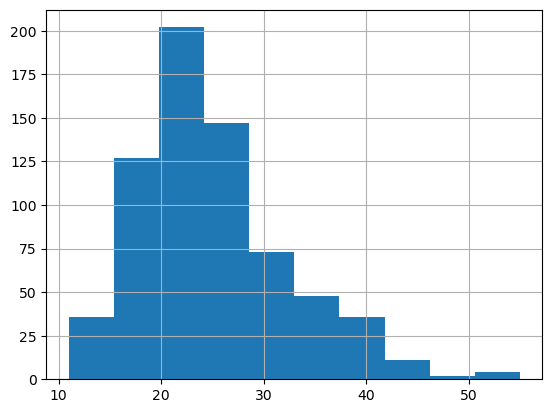

In [3]:
df['Description'].str.len().hist()

1. Descriptions range from 11-55 characters
2. Maximum count : 20 - 30 characters

In [4]:
def plot_word_number_histogram(text):
    text.str.split().map(lambda x: len(x)).hist()

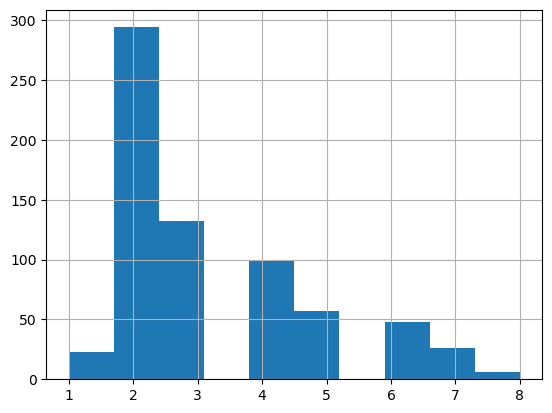

In [5]:
plot_word_number_histogram(df['Description'])

1. Word count per sentence ranges from 2-4 words approx
2. Majorly distributed : 2-4 words as well

<AxesSubplot: >

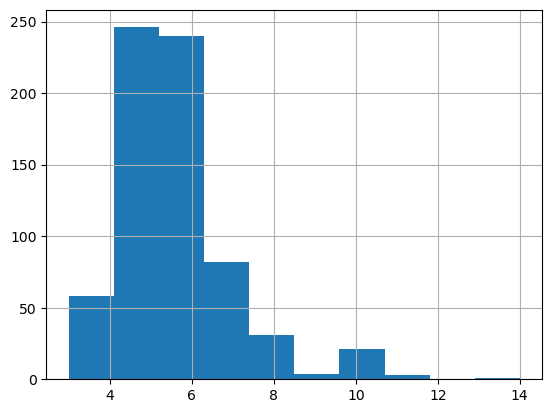

In [6]:
# word count on avg
df['Description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

Barely 4 - 7 words in each description

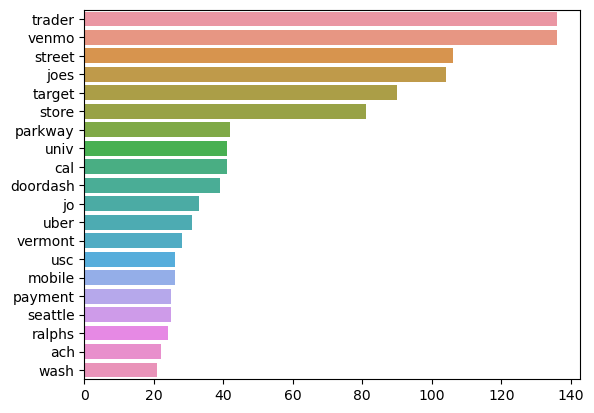

In [7]:
# Barplot for cleaned data 

def plot_top_words(text, top_n=20):
    top_20 = Counter(" ".join(text).split()).most_common(20)
    x,y = zip(*top_20)
    sns.barplot(x=list(y),y=list(x))

plot_top_words(df['Description'])

Most number of transactions seem to be done in grocery (trader joes)

## N grams analysis

In [8]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                        for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

Top 2 ngrams


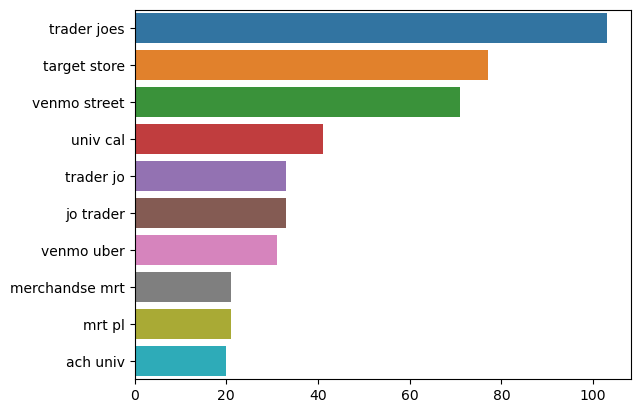

Top 3 ngrams


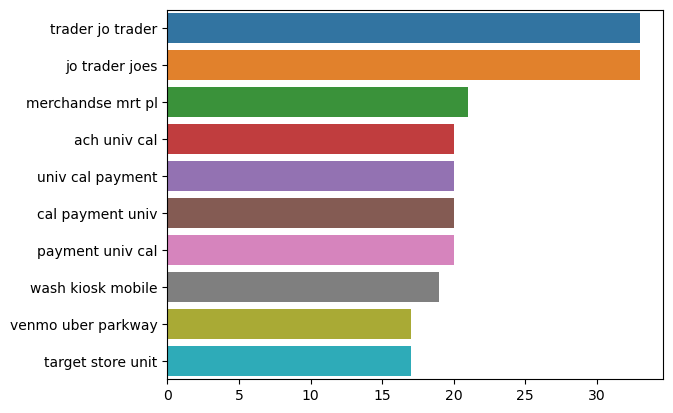

Top 4 ngrams


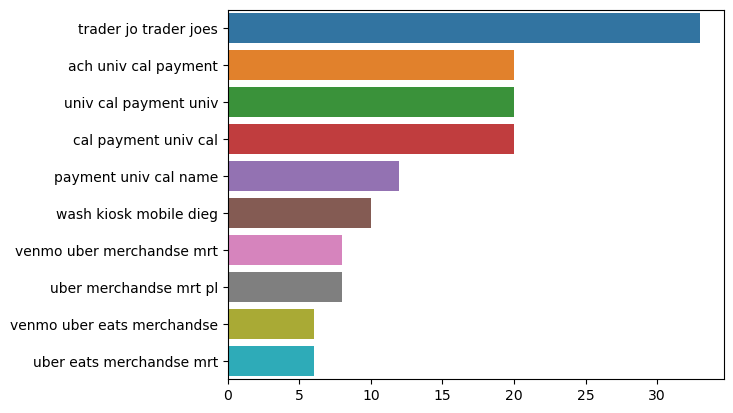

Top 5 ngrams


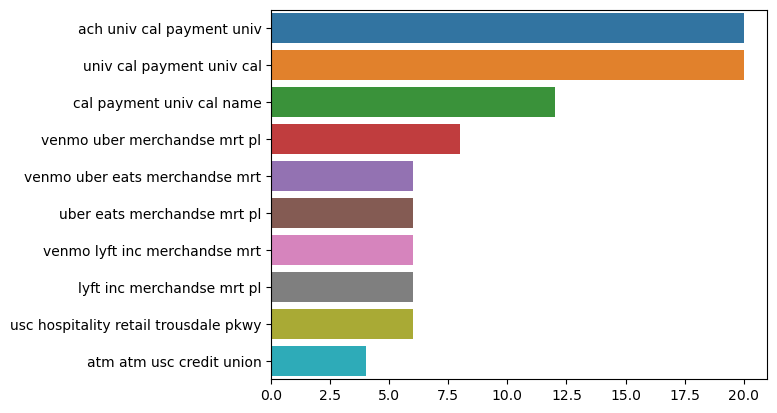

Top 6 ngrams


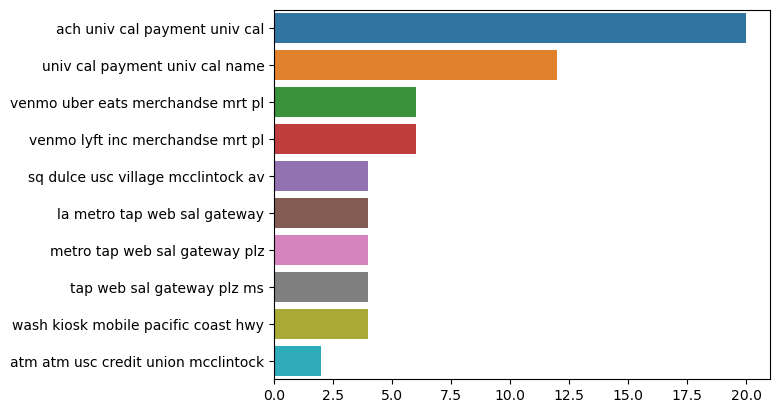

In [9]:
for i in range(2,7):
    print("Top {} ngrams".format(i))
    plot_top_ngrams_barchart(df['Description'],i)
    plt.show()

# References 
https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools